In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys


import mygabasic as ga
 
%aimport mygabasic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Open Loop

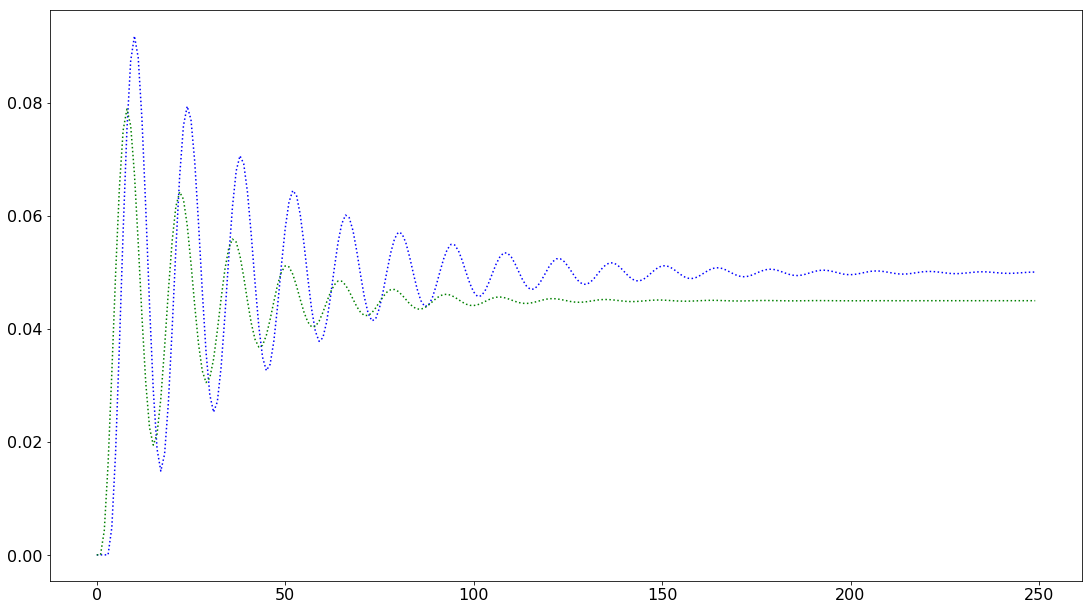

In [155]:


def zyz1():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

def zyz2():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[3]*0.00419 + X[2]*0.00431 + Y[2]*(-0.9231) + Y[1]*1.734
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

zyz1Ite,zyz1Out = zyz1()
zyz2Ite,zyz2Out = zyz2()
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(zyz1Ite),
         np.squeeze(zyz1Out),
         'b:',
         np.squeeze(zyz2Ite),
         np.squeeze(zyz2Out),
         'g:') 
plt.savefig('DynamicsOpenLoop.pdf', format='pdf')
plt.show()

# Closed Loop

In [141]:
# def zyz1CloseLoop(P=0,Ki=18.52677354,Kd=0.30084384):
# def zyz1CloseLoop(P=0.03440869,Ki= 17.27241234,Kd=0):
# def zyz1CloseLoop(P=0,Ki=18.11434344,Kd=0.42478245):
# def zyz1CloseLoop(P=0,Ki=17.74563931,Kd=0):


def zyz1CloseLoop(P=0,Ki=18.62142993,Kd=0.31548802):
    X = np.zeros(6)
    Y = np.zeros(6)
    SetPoint = 1
    Iterations = []
    # Proces Out
    Out = []
    # Control out sigma/component
    Count = []
    ErrSum = 0
    prevErr = 0
    Iout = 0
    # Inittial Control Out 
    err = SetPoint - Y[0]
    ErrSum = ErrSum + ((err*err)/2)
    Pout = err*P
    Dout = 0
    prevErr = err
    Iout = Iout + err*0.1*Ki
    X[0] = Pout + Dout + Iout
    for i in range(250):
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        Iterations.append(i)
        Out.append(Y[0])
        Count.append(Dout)
        err = SetPoint - Y[0]
        ErrSum = ErrSum + ((err*err)/2)
        Pout = err*P
        Dout = ((err - prevErr)/0.1)*Kd
        prevErr = err
        Iout = Iout + err*0.1*Ki
        Y = np.roll(Y, 1)
        X = np.roll(X, 1)
        X[0] = Pout + Dout + Iout
        
    return Iterations,Out,Count,ErrSum

4.868526718509287


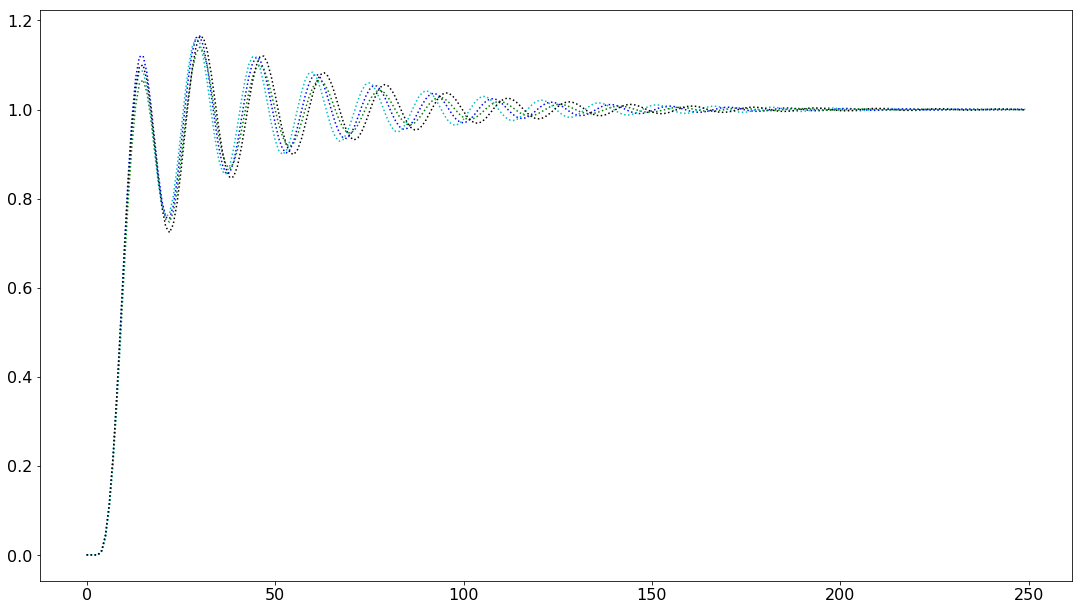

In [156]:
Iterations,Out,Count,ErrSum = zyz1CloseLoop(P=0,Ki=18.52677354,Kd=0.30084384)
# Iterations2,Out2,Count2,ErrSum2 = zyz1CloseLoop(P=0.03440869,Ki= 17.27241234,Kd=0.11)
Iterations2,Out2,Count2,ErrSum2 = zyz1CloseLoop(P=0.03440869,Ki= 17.27241234,Kd=0.11)
Iterations3,Out3,Count3,ErrSum3 = zyz1CloseLoop(P=0,Ki=18.11434344,Kd=0.42478245)
Iterations4,Out4,Count4,ErrSum4 = zyz1CloseLoop(P=0.22,Ki=17.74563931,Kd=0)
print(ErrSum)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(Iterations),
         np.squeeze(Out),
         'b:',
         np.squeeze(Iterations2),
         np.squeeze(Out2),
         'g:',
         np.squeeze(Iterations3),
         np.squeeze(Out3),
         'c:',
         np.squeeze(Iterations4),
         np.squeeze(Out4),
         'k:')
plt.savefig('DynamicHillClimbinfOpenLoop.pdf', format='pdf')
plt.show()

# Hill Climbing

In [144]:
def rdmGauss(sigma = 0.2, mu = 0):
    return np.random.normal(mu, sigma, 1)

def min_HillClimbing(fevalMtx,sigma = 0.7):
    Y = np.copy(fevalMtx)
    for y in Y:
        y[0] = y[0] + rdmGauss(sigma = sigma)
        
        if y[0] < 0 :
            y[0] = 0
        elif y[0] > 600:
            y[0] = 600
    
    _,_,_,prev = zyz1CloseLoop(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0])
    _,_,_,new = zyz1CloseLoop(P=Y[0][0],Ki=Y[1][0],Kd=Y[2][0]);
    
    if new <= prev:
        return new, Y
    else:
        return prev, fevalMtx

 Iteration 29

mean: 2.984205478657106e+136
std: 1.6070438318169892e+137
median: 9.711898961011764e+85
min: 4.917326749917391
max: 8.952616434489143e+137
[[ 0.        ]
 [18.61882611]
 [ 0.        ]]
4.917326749917391


/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


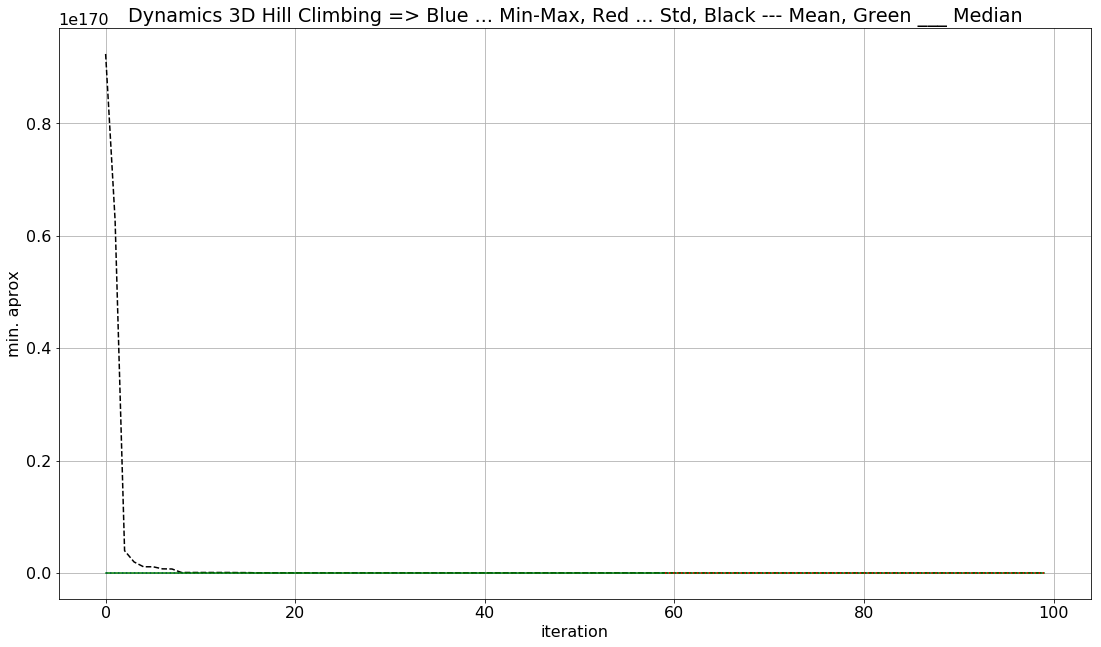

/Users/SerG1oAC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in multiply


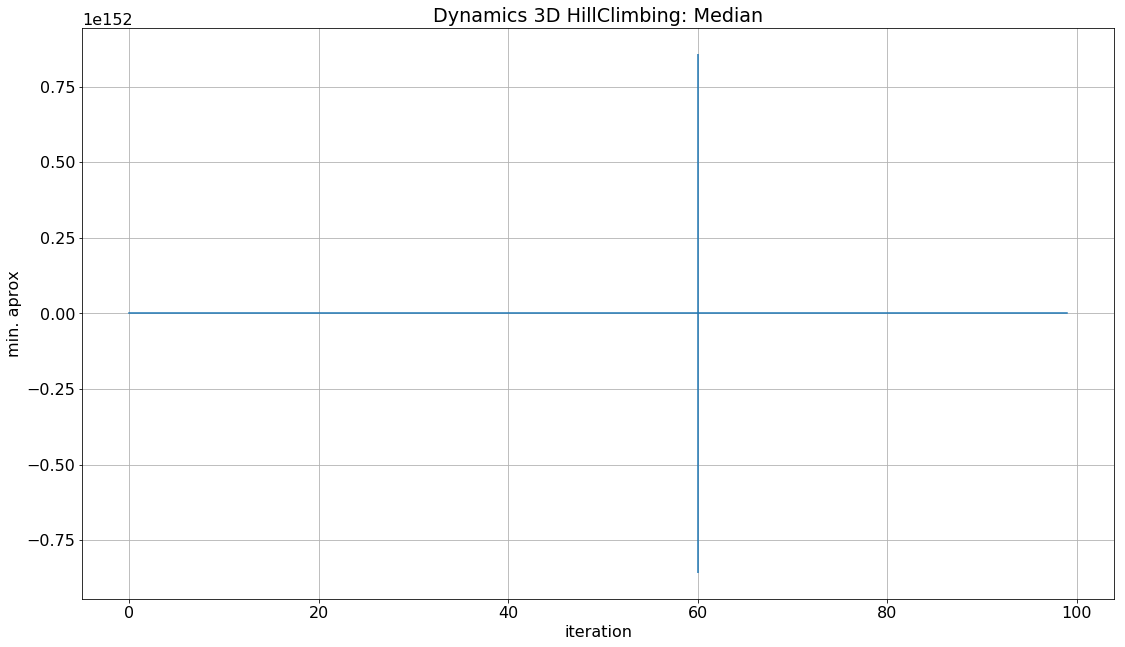

In [154]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 100
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    
repetitions = 30
OUT_Matrix = np.zeros((repetitions, iterSize))
iniRef = 100000000
bestVal =   np.zeros((3, 1))  

for j in range(0, repetitions):
    Iterations = []
    
    fevalRdm =  np.random.uniform(low=0, high=600, size=(valVectorSize, 1))
    delta = np.zeros((valVectorSize, 1))
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    for i in range(0, iterSize):
        OUT, fevalRdm = min_HillClimbing(fevalRdm,sigma = 10)
        OUT_Matrix[j][i] = OUT
        Iterations.append(i)
    
    if OUT < iniRef:
        bestVal = np.copy(fevalRdm)
        iniRef = OUT
        
    Best_List.append(OUT)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Hill Climbing => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsHillClimbing_3d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D HillClimbing: Median")
plt.grid()
plt.savefig('DynamicsHillClimbingStd_2d.pdf', format='pdf')
plt.show()